# EDA 

In [29]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# group columns by meanings
shape_cols = ['Aspect.Ratio','Geodesic.Aspect.Ratio','Circularity','Circularity..Hu.','Elongation','Perimeter']
texture_cols = ['Transparency','Edge.Gradient','Roughness','Sigma.Intensity','Sum.Intensity','Intensity']
size_cols = ['Area..ABD.','Area..Filled.','Diameter..FD.','Diameter..ESD.','Diameter..ABD.','Width','Length','Geodesic.Length']
convexity_cols = ['Convex.Perimeter','Convexity','Compactness']
env_cols_non_numeric = ['lat0','wind','loc', 'lon0', 'site', 'lon1', 'lat1']
env_cols_numeric = ['burbotden', 'avgdepth', 'precip', 'xwaveht', 'mindepth', 'otherfishden', 'cloud_pc', 'maxdepth', 'watert', 'yperchden', 'xangle']
machine_cols = ['gdd2','volbest','trawltime','sam', 'rep', 'repnum', 'fr', 'effspeed']
datetime_cols = ['doy', 'day', 'year', 'month']
file_cols = ['tifffile','csvfile','Image.File','source_file','Time','Timestamp','key','Original.Reference.ID','Date']

In [6]:
import pandas as pd
final_output = "merged_filtered_zooplankton_data.csv"  # Final merged file
df = pd.read_csv(final_output)
df['Class'] = df['Class'].map({'Calanoid_1':'Calanoid', 'Cyclopoid_1':'Cyclopoid'}) # Clean original class name

In [ ]:
# Count missing values per column
missing_values = df.isnull().sum() / df.shape[0]
print(missing_values[missing_values > 0])  # Show only columns with missing values


Biovolume..Cylinder.       0.968085
Biovolume..P..Spheroid.    0.968085
Biovolume..Sphere.         0.968085
distshore                  0.127260
whitefishden               0.016349
unknwcoregonine            0.016349
ciscoden                   0.016349
exposure                   0.028159
smeltden                   1.000000
dtype: float64


Based on the meaning of these columns, those are not significant. Igonre these in the analysis. 


In [9]:
missing_cols = missing_values[missing_values > 0].index
cols_interested = list(set(df.columns).difference(set(missing_cols)))
df = df[cols_interested]

In [10]:
df.shape

(394263, 91)

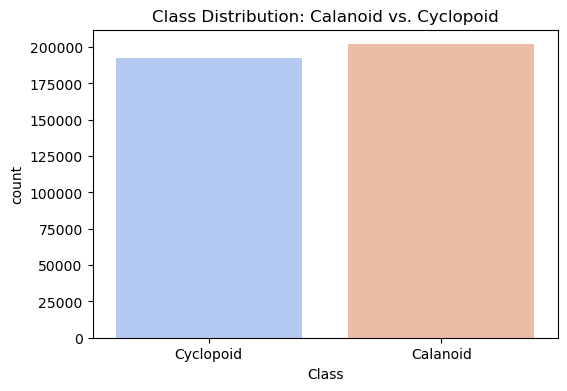

In [ ]:
# Count plot of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df, palette="coolwarm")
plt.title("Class Distribution: Calanoid vs. Cyclopoid")
plt.show()

In [13]:
df['Class'].value_counts() / len(df)

Class
Calanoid     0.512014
Cyclopoid    0.487986
Name: count, dtype: float64

## Compare features for the two classes

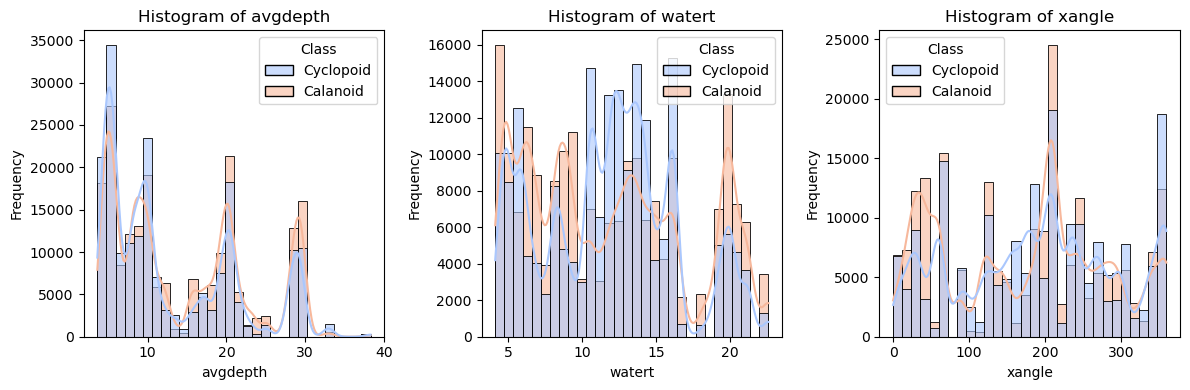

In [16]:
# Features to plot
features = ['avgdepth', 'watert', 'xangle'] 
 
# Determine grid size dynamically
num_features = len(features)
rows = math.ceil(num_features / 3)  # Adjust rows based on number of features
cols = min(3, num_features)  # Limit columns to 3

plt.figure(figsize=(cols * 4, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)  # Adjust grid dynamically
    sns.histplot(df, x=feature, hue="Class", kde=True, bins=30, palette="coolwarm", alpha=0.6)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


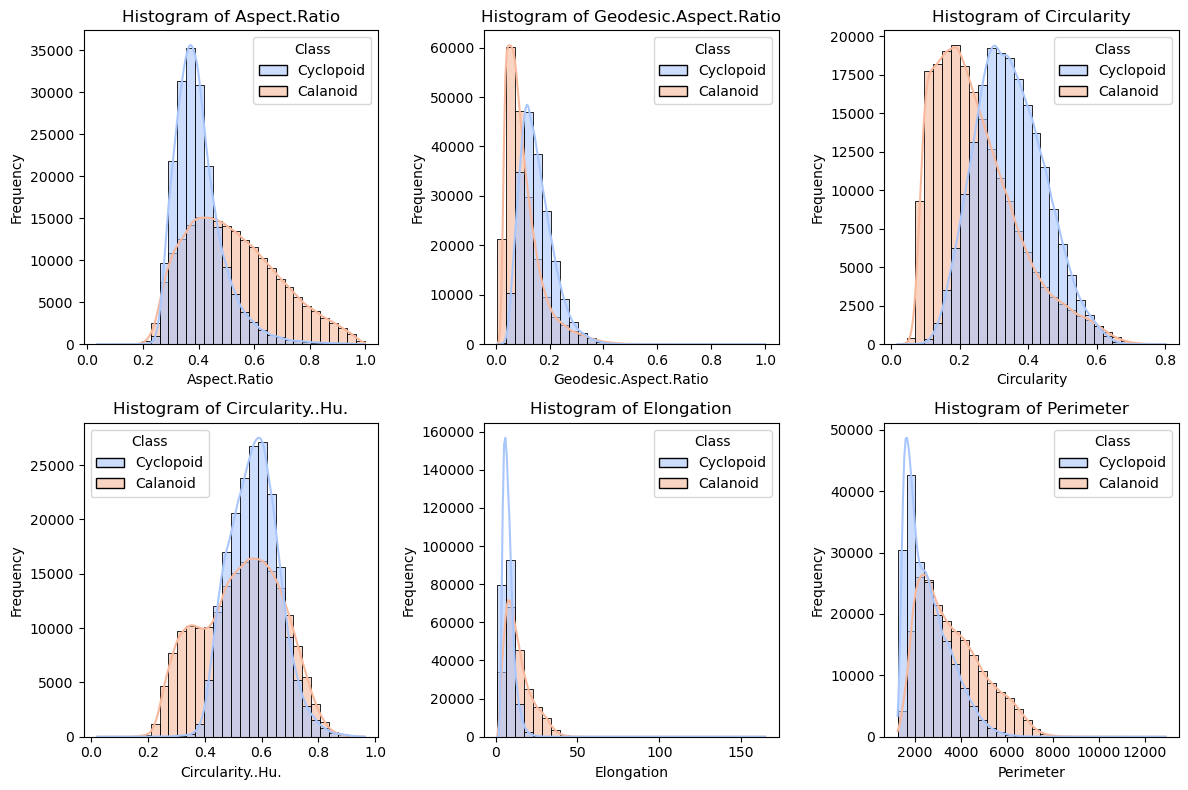

In [ ]:
# Features to plot
features = shape_cols 

# Determine grid size dynamically
num_features = len(features)
rows = math.ceil(num_features / 3)  # Adjust rows based on number of features
cols = min(3, num_features)  # Limit columns to 3

plt.figure(figsize=(cols * 4, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)  # Adjust grid dynamically
    sns.histplot(df, x=feature, hue="Class", kde=True, bins=30, palette="coolwarm", alpha=0.6)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


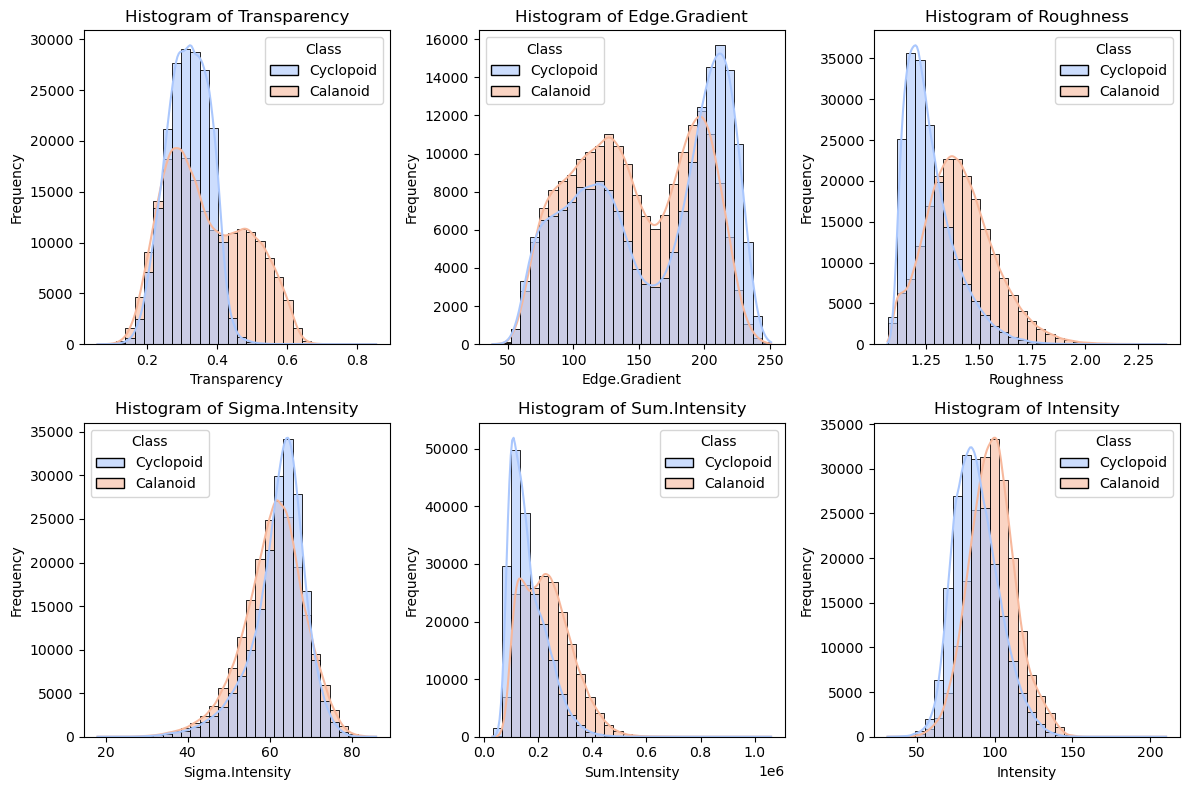

In [18]:
# Features to plot
features = texture_cols 

# Determine grid size dynamically
num_features = len(features)
rows = math.ceil(num_features / 3)  # Adjust rows based on number of features
cols = min(3, num_features)  # Limit columns to 3

plt.figure(figsize=(cols * 4, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)  # Adjust grid dynamically
    sns.histplot(df, x=feature, hue="Class", kde=True, bins=30, palette="coolwarm", alpha=0.6)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

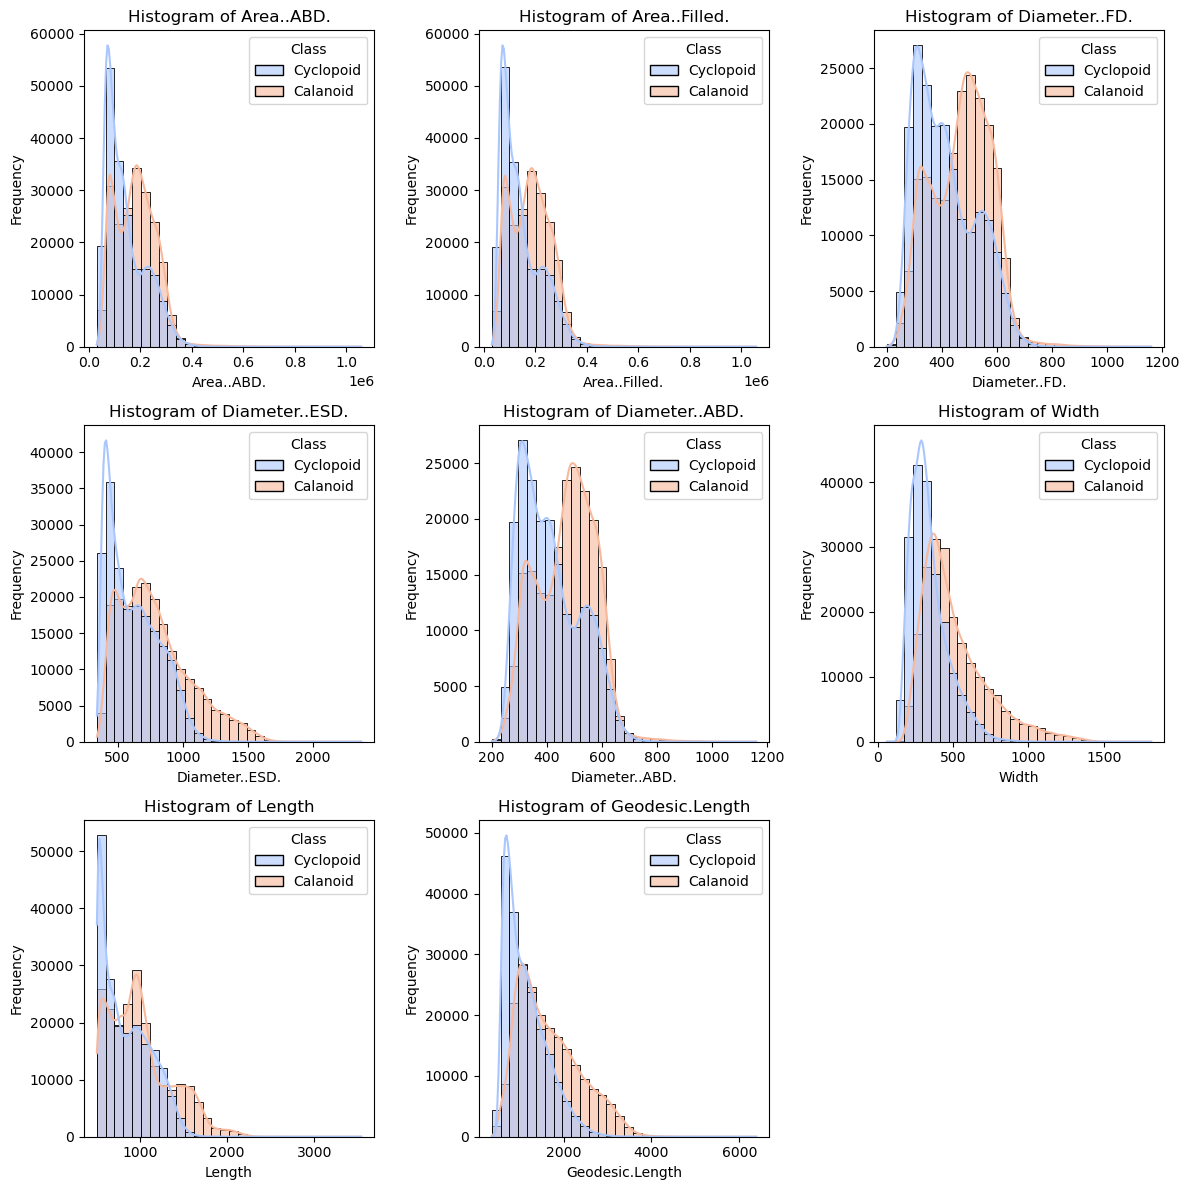

In [ ]:
# List of features to plot
features = size_cols

# Determine grid size dynamically
num_features = len(features)
rows = math.ceil(num_features / 3)  # Adjust rows based on number of features
cols = min(3, num_features)  # Limit columns to 3

plt.figure(figsize=(cols * 4, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)  # Adjust grid dynamically
    sns.histplot(df, x=feature, hue="Class", kde=True, bins=30, palette="coolwarm", alpha=0.6)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

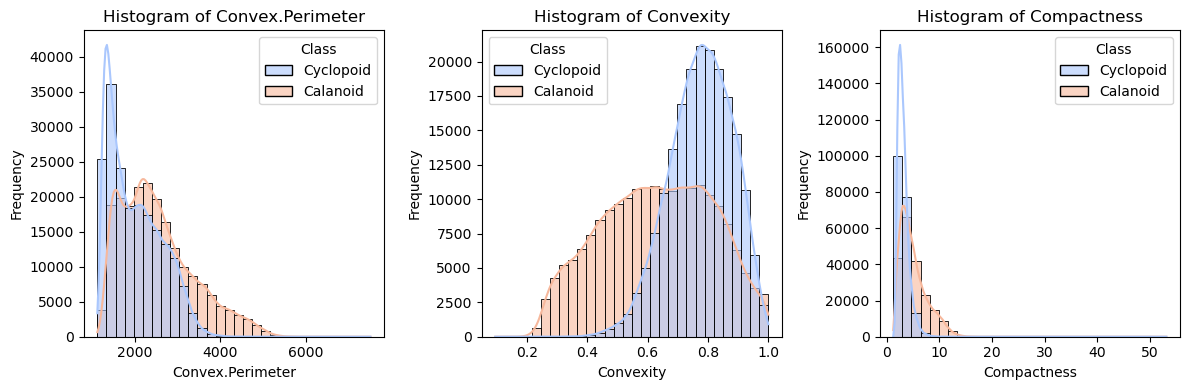

In [19]:
# Features to plot
features = convexity_cols 

# Determine grid size dynamically
num_features = len(features)
rows = math.ceil(num_features / 3)  # Adjust rows based on number of features
cols = min(3, num_features)  # Limit columns to 3

plt.figure(figsize=(cols * 4, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)  # Adjust grid dynamically
    sns.histplot(df, x=feature, hue="Class", kde=True, bins=30, palette="coolwarm", alpha=0.6)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

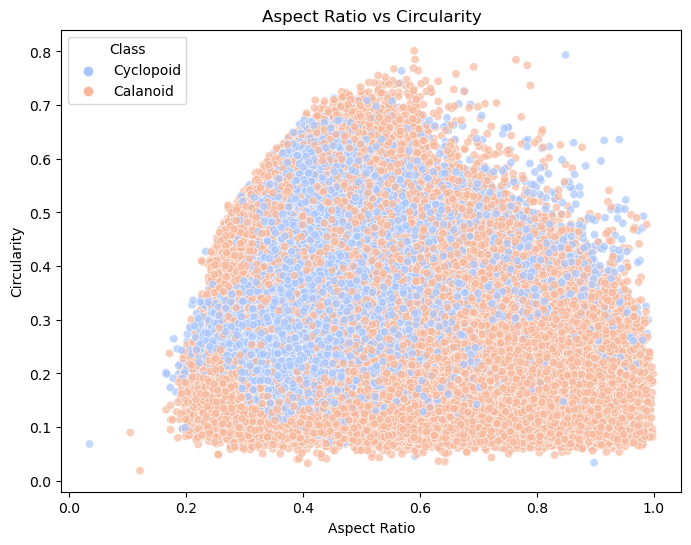

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Aspect.Ratio", y="Circularity", hue="Class", data=df, palette="coolwarm", alpha=0.7)
plt.title("Aspect Ratio vs Circularity")
plt.xlabel("Aspect Ratio")
plt.ylabel("Circularity")
plt.show()

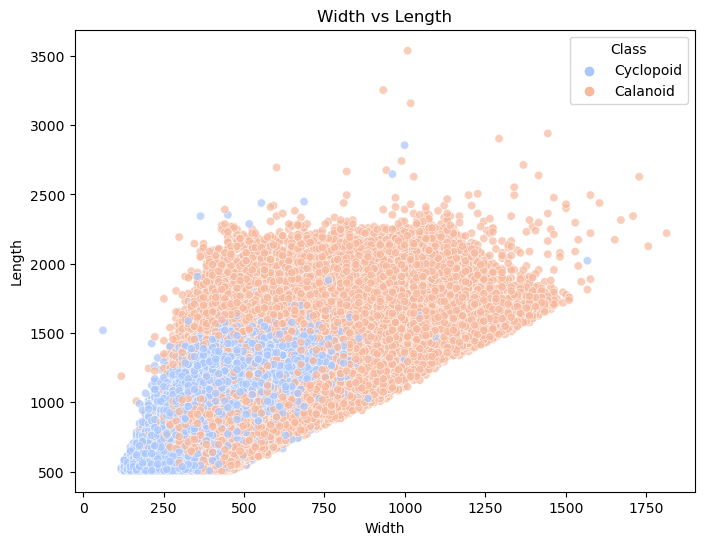

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Width", y="Length", hue="Class", data=df, palette="coolwarm", alpha=0.7)
plt.title("Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")
plt.show()


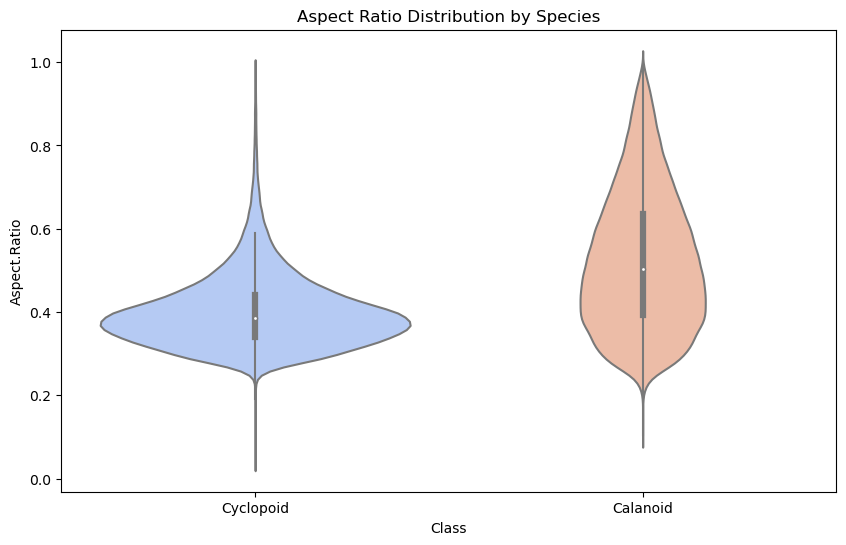

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Class", y="Aspect.Ratio", data=df, palette="coolwarm")
plt.title("Aspect Ratio Distribution by Species")
plt.show()

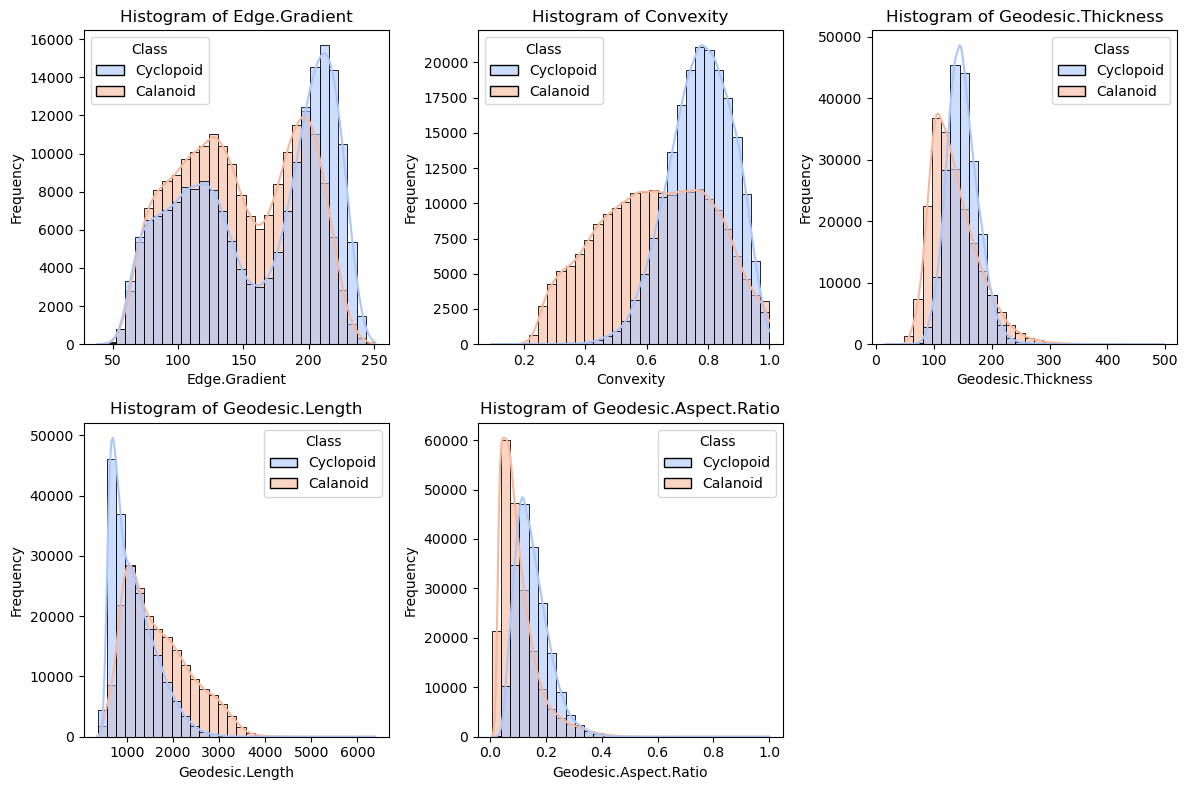

In [21]:
# Features to plot
antenna_cols = ['Edge.Gradient','Convexity','Geodesic.Thickness','Geodesic.Length','Geodesic.Aspect.Ratio']
features = antenna_cols 
 
# Determine grid size dynamically
num_features = len(features)
rows = math.ceil(num_features / 3)  # Adjust rows based on number of features
cols = min(3, num_features)  # Limit columns to 3

plt.figure(figsize=(cols * 4, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)  # Adjust grid dynamically
    sns.histplot(df, x=feature, hue="Class", kde=True, bins=30, palette="coolwarm", alpha=0.6)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

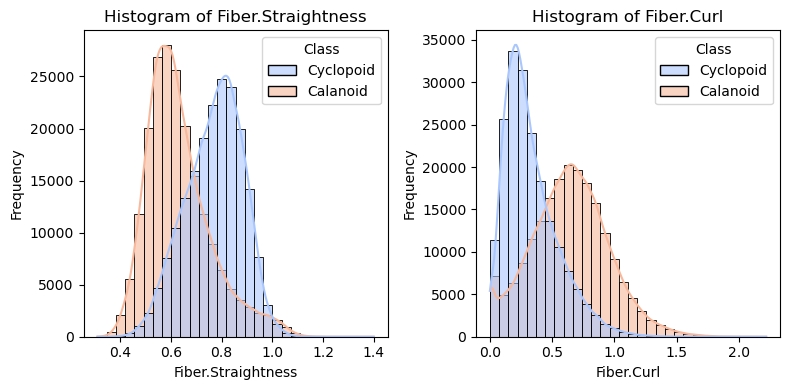

In [22]:
# Features to plot
features = ['Fiber.Straightness','Fiber.Curl'] 
 
# Determine grid size dynamically
num_features = len(features)
rows = math.ceil(num_features / 3)  # Adjust rows based on number of features
cols = min(3, num_features)  # Limit columns to 3

plt.figure(figsize=(cols * 4, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)  # Adjust grid dynamically
    sns.histplot(df, x=feature, hue="Class", kde=True, bins=30, palette="coolwarm", alpha=0.6)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

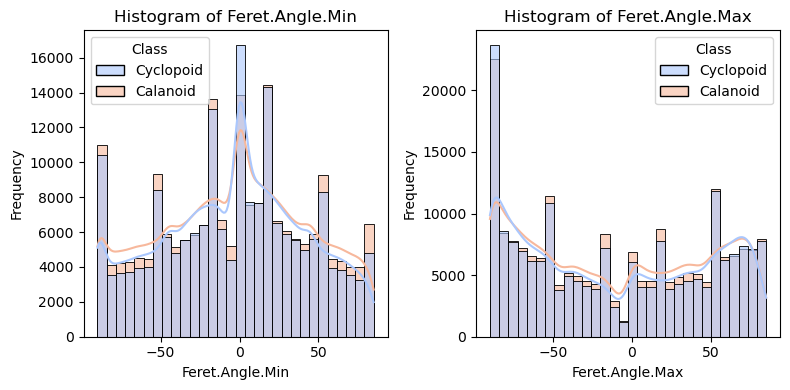

In [23]:
# Features to plot
features = ['Feret.Angle.Min','Feret.Angle.Max'] 
 
# Determine grid size dynamically
num_features = len(features)
rows = math.ceil(num_features / 3)  # Adjust rows based on number of features
cols = min(3, num_features)  # Limit columns to 3

plt.figure(figsize=(cols * 4, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)  # Adjust grid dynamically
    sns.histplot(df, x=feature, hue="Class", kde=True, bins=30, palette="coolwarm", alpha=0.6)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Drop non-numeric columns (e.g., file names, categorical variables)
non_numeric_cols = env_cols_non_numeric+machine_cols+datetime_cols+file_cols+['Class']
df_numeric = df.drop(columns=non_numeric_cols, errors="ignore")

# Standardize the features (PCA is sensitive to scale)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


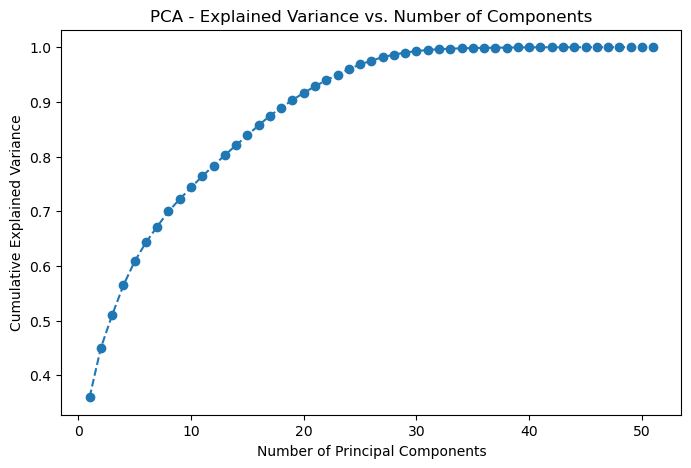

In [25]:
# Apply PCA
pca = PCA(n_components=51)  # Set maximum to the total number of features
pca.fit(df_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs. Number of Components")
plt.show()


In [26]:
# Find the number of components that explain 95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {n_components}")

# Re-run PCA with optimal components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# Convert back to DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(n_components)])


Optimal number of components: 24


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the target variable (class labels)
y = df["Class"]  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy with PCA: {accuracy:.2f}")


Classification Accuracy with PCA: 0.91


In [28]:
# Show feature importance from first few PCs
pca_feature_importance = pd.DataFrame(np.abs(pca.components_), 
                                      columns=df_numeric.columns, 
                                      index=[f"PC{i+1}" for i in range(n_components)])

# Rank features based on their contribution to PC1
top_features = pca_feature_importance.iloc[0].sort_values(ascending=False)
print("Top Contributing Features to PC1:\n", top_features.head(24))


Top Contributing Features to PC1:
 Geodesic.Length          0.226212
Perimeter                0.225904
Diameter..ESD.           0.221155
Convex.Perimeter         0.221155
Length                   0.208954
Elongation               0.201930
Compactness              0.201627
Width                    0.200947
Sum.Intensity            0.200388
Circularity              0.199645
Volume..ESD.             0.198945
Diameter..ABD.           0.188913
Convexity                0.188865
Area..ABD.               0.188387
Diameter..FD.            0.188347
Geodesic.Aspect.Ratio    0.187620
Area..Filled.            0.187580
Volume..ABD.             0.183257
Image.Height             0.179412
Image.Width              0.175947
Transparency             0.173025
Circularity..Hu.         0.154673
Circle.Fit               0.151479
Fiber.Straightness       0.151447
Name: PC1, dtype: float64


## Correlation heatmap

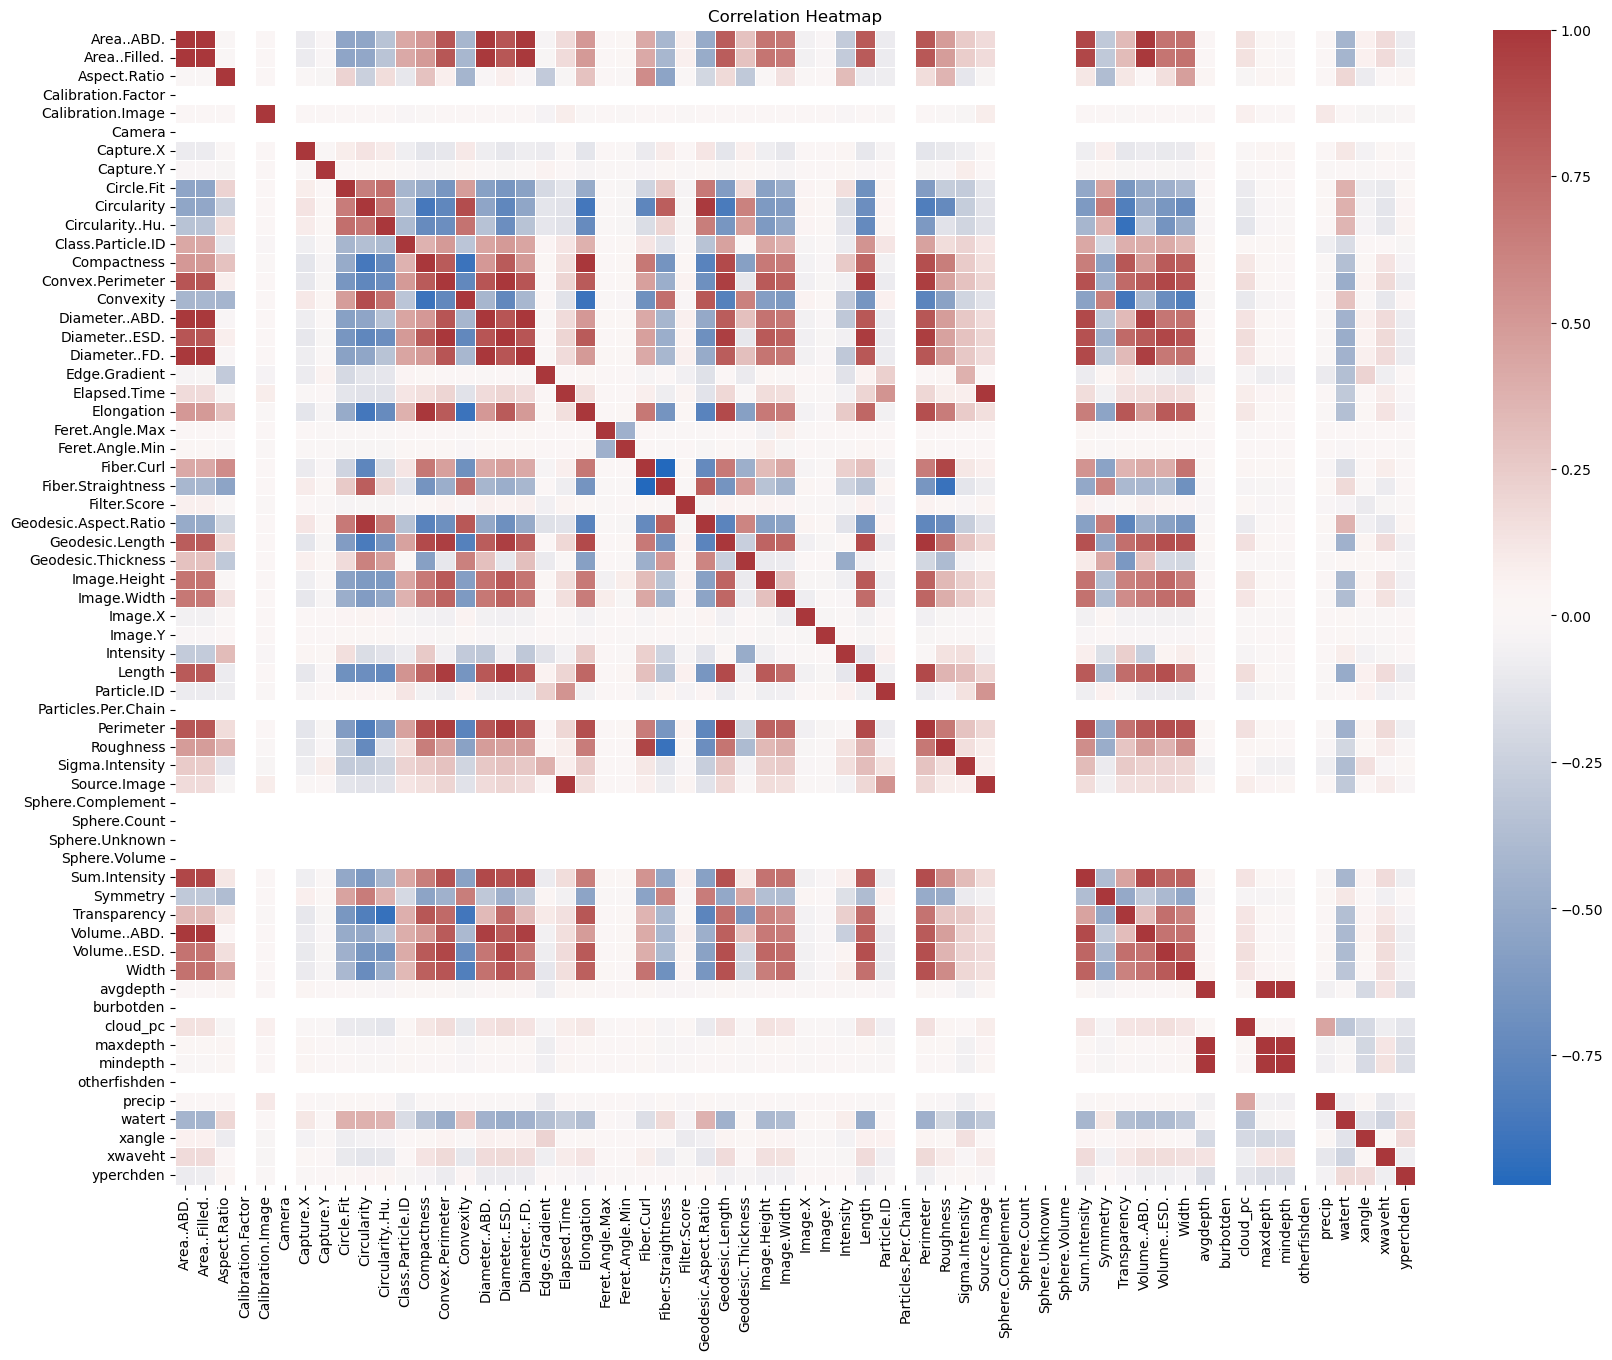

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Sort correlation matrix by column name (alphabetically)
corr_matrix = corr_matrix.reindex(sorted(corr_matrix.columns), axis=0)  # Sort rows
corr_matrix = corr_matrix.reindex(sorted(corr_matrix.columns), axis=1)  # Sort columns

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap="vlag", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


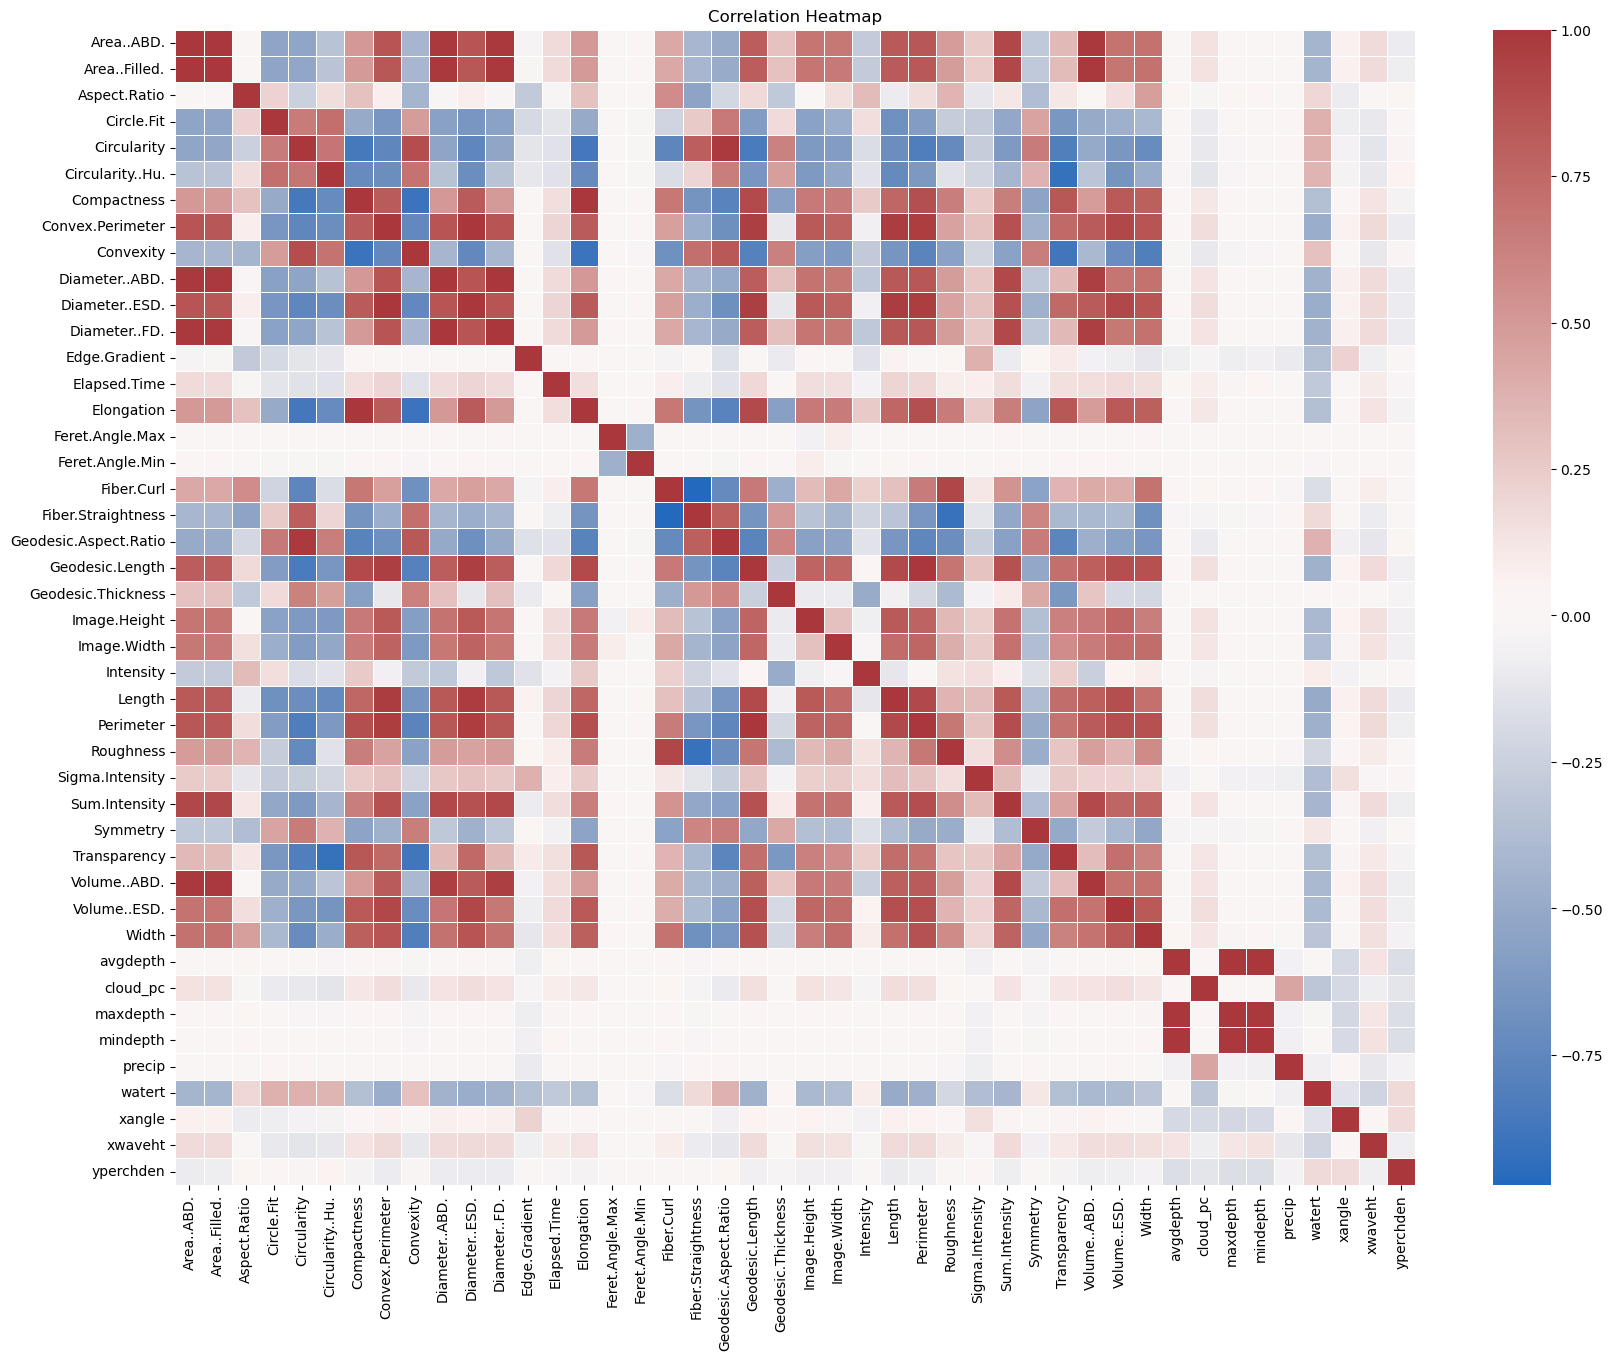

In [31]:
# Missing in heatmap
missing_cols = ['Calibration.Factor','Camera','Particles.Per.Chain','Sphere.Complement','Sphere.Count','Sphere.Unknown','Sphere.Volume','burbotden','otherfishden',
'Capture.X','Capture.Y','Calibration.Image','Image.X','Image.Y','Particle.ID','Source.Image','Class.Particle.ID','Filter.Score']

# Compute correlation matrix
df_temp = df_numeric.drop(columns=missing_cols, errors="ignore")
corr_matrix = df_temp.corr()

# Sort correlation matrix by column name (alphabetically)
corr_matrix = corr_matrix.reindex(sorted(corr_matrix.columns), axis=0)  # Sort rows
corr_matrix = corr_matrix.reindex(sorted(corr_matrix.columns), axis=1)  # Sort columns

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap="vlag", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [32]:
corr_list = (
    corr_matrix
    .abs()  # Take absolute values
    .unstack()  # Convert to long format
    .reset_index()  # Convert to DataFrame
)
# Rename columns
corr_list.columns = ["Feature_1", "Feature_2", "Correlation"]

# Remove self-correlations (where Feature_1 == Feature_2)
corr_list = corr_list[corr_list["Feature_1"] != corr_list["Feature_2"]]

# Sort by highest absolute correlation
corr_list = corr_list.sort_values(by="Correlation", ascending=False)

# Display top correlations
print(corr_list.head(20))  # Show top 20 most correlated pairs

             Feature_1         Feature_2  Correlation
318   Convex.Perimeter    Diameter..ESD.     0.999997
447     Diameter..ESD.  Convex.Perimeter     0.999997
622         Elongation       Compactness     0.999980
278        Compactness        Elongation     0.999980
407     Diameter..ABD.     Diameter..FD.     0.999583
493      Diameter..FD.    Diameter..ABD.     0.999583
44       Area..Filled.        Area..ABD.     0.999325
1           Area..ABD.     Area..Filled.     0.999325
1164         Perimeter   Geodesic.Length     0.998548
906    Geodesic.Length         Perimeter     0.998548
1707          mindepth          avgdepth     0.996987
1578          avgdepth          mindepth     0.996987
1577          avgdepth          maxdepth     0.996833
1663          maxdepth          avgdepth     0.996833
9           Area..ABD.    Diameter..ABD.     0.990858
396     Diameter..ABD.        Area..ABD.     0.990858
55       Area..Filled.     Diameter..FD.     0.990702
485      Diameter..FD.     A

In [33]:
print(corr_list.tail(20))

            Feature_1        Feature_2  Correlation
1687         mindepth  Feret.Angle.Max     0.000489
698   Feret.Angle.Max         mindepth     0.000489
587      Elapsed.Time  Feret.Angle.Max     0.000484
673   Feret.Angle.Max     Elapsed.Time     0.000484
741   Feret.Angle.Min         maxdepth     0.000441
1644         maxdepth  Feret.Angle.Min     0.000441
695   Feret.Angle.Max         avgdepth     0.000371
1555         avgdepth  Feret.Angle.Max     0.000371
742   Feret.Angle.Min         mindepth     0.000270
1688         mindepth  Feret.Angle.Min     0.000270
1643         maxdepth  Feret.Angle.Max     0.000249
697   Feret.Angle.Max         maxdepth     0.000249
1738           precip     Image.Height     0.000203
1007     Image.Height           precip     0.000203
1716           precip       Area..ABD.     0.000190
39         Area..ABD.           precip     0.000190
1717           precip    Area..Filled.     0.000088
83      Area..Filled.           precip     0.000088
739   Feret.

In [34]:
import pandas as pd
import numpy as np

# See those are negatively related
# Convert to a numerical list and keep only unique pairs (excluding self-correlations)
corr_list = (
    corr_matrix
    .where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))  # Keep lower triangle, exclude diagonal
    .stack()  # Convert to long format
    .reset_index()
)

# Rename columns
corr_list.columns = ["Feature_1", "Feature_2", "Correlation"]

# Sort by actual correlation values (not absolute)
corr_list = corr_list.sort_values(by="Correlation", ascending=False)

# Display the correlation table
print(corr_list.head(20))  # Show top 20 most correlated feature pairs


                 Feature_1         Feature_2  Correlation
52          Diameter..ESD.  Convex.Perimeter     0.999997
97              Elongation       Compactness     0.999980
64           Diameter..FD.    Diameter..ABD.     0.999583
0            Area..Filled.        Area..ABD.     0.999325
345              Perimeter   Geodesic.Length     0.998548
738               mindepth          avgdepth     0.996987
701               maxdepth          avgdepth     0.996833
36          Diameter..ABD.        Area..ABD.     0.990858
56           Diameter..FD.     Area..Filled.     0.990702
55           Diameter..FD.        Area..ABD.     0.990663
37          Diameter..ABD.     Area..Filled.     0.989850
496           Volume..ABD.        Area..ABD.     0.989403
497           Volume..ABD.     Area..Filled.     0.989123
740               mindepth          maxdepth     0.987661
175  Geodesic.Aspect.Ratio       Circularity     0.982642
310                 Length    Diameter..ESD.     0.971695
307           

In [35]:
print(corr_list.tail(20))

                 Feature_1              Feature_2  Correlation
344              Perimeter  Geodesic.Aspect.Ratio    -0.753818
140             Fiber.Curl            Circularity    -0.756500
484           Transparency  Geodesic.Aspect.Ratio    -0.769904
333              Perimeter              Convexity    -0.775414
209        Geodesic.Length  Geodesic.Aspect.Ratio    -0.777329
177  Geodesic.Aspect.Ratio            Compactness    -0.779478
185  Geodesic.Aspect.Ratio             Elongation    -0.783419
198        Geodesic.Length              Convexity    -0.799860
569                  Width              Convexity    -0.810700
469           Transparency            Circularity    -0.817585
329              Perimeter            Circularity    -0.820525
194        Geodesic.Length            Circularity    -0.843721
19             Compactness            Circularity    -0.861894
95              Elongation            Circularity    -0.865011
473           Transparency              Convexity    -0